<img style="float: left;;" src='Figures/alinco.png' /></a>

# <center> <font color= #000047> Relaciones Lineales </font> </center>

In [1]:
from sklearn.datasets import load_wine
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
X=np.array([1,2,3])
W=np.array([[1,0,0],[0,0.55,0.3]])
W@X

array([1., 2.])

---
# Relaciones lineales

In [3]:
LW=load_wine()
data=LW.data
names=LW.feature_names
df=pd.DataFrame(data=data,columns=names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
print(LW.DESCR)

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

## Relación entre `flavanoids` y `ash`

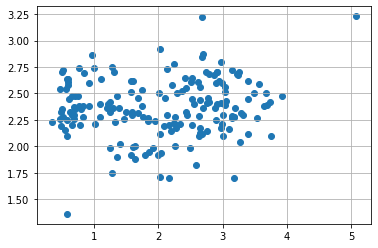

In [5]:
# Gráfica flavanoids vs ash
plt.scatter(df['flavanoids'],df['ash'])
plt.grid()


## Relación entre `alcalinity_of_ash` y `ash`

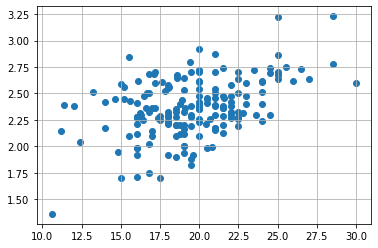

In [6]:
# Gráfica alcalinity_of_ash vs ash
plt.scatter(df['alcalinity_of_ash'],df['ash'])
plt.grid()

Encontrar la mejor función lineal que relacione a las variables

In [7]:
minimize?

In [8]:
# Definimos 'fun', el criterio de minimizacion
#
# ash=a[0]+a[1]*flavanoids
def fun(a,x,y):
  f=a[0]+a[1]*x
  return np.mean((f-y)**2)

In [9]:
a0=np.random.rand(2) # Dos elementos uniformemente distrubuidos entre 0 y 1
sol=minimize(fun,a0,args=(df.flavanoids,df.ash))
sol

      fun: 0.07385068677099037
 hess_inv: array([[ 2.57533485, -1.02270037],
       [-1.02270037,  0.5039746 ]])
      jac: array([ 4.65661287e-09, -9.31322575e-09])
  message: 'Optimization terminated successfully.'
     nfev: 18
      nit: 4
     njev: 6
   status: 0
  success: True
        x: array([2.30237813, 0.0316068 ])

---
La ecuación óptima que relaciona `flavanoids` y `ash` es 
$$
ash=2.3+0.0316\;flavanoids,
$$
con un $mse=0.07385$.

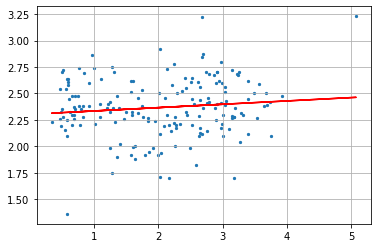

In [10]:
# Flavanoids vs ash
plt.scatter(df.flavanoids,df.ash,s=5) # s=size
x=df.flavanoids
a=sol.x
f=a[0]+a[1]*x
plt.plot(x,f,'r') # 'r'=red
plt.grid() # Cuadrícula de fondo

In [11]:
mean_squared_error(df.ash, f)

0.07385068677099035

In [12]:
r2_score(f,df.ash)

-73.51300919465967

In [13]:
# Función lineal que relaciona Ash vs su alcalinidad
#
# Usamos la misma función 'fun' (criterio de optimización) y las mismas condiciones iniciales 'a0'
sol2=minimize(fun,a0,args=(df.alcalinity_of_ash,df.ash))
sol2

      fun: 0.060129813645393396
 hess_inv: array([[17.63488211, -0.87894281],
       [-0.87894281,  0.04508407]])
      jac: array([2.32830644e-08, 4.63798642e-07])
  message: 'Optimization terminated successfully.'
     nfev: 21
      nit: 5
     njev: 7
   status: 0
  success: True
        x: array([1.65646789, 0.03642221])

---
La ecuación óptima que relaciona `alcalinity_of_ash` con `ash` es
$$
ash=1.656+0.0364\;alcalinity\_of\_ash,
$$
con un $mse=0.06013$.

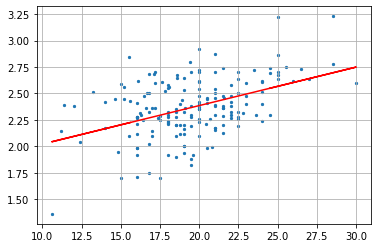

In [14]:
a=sol2.x
x=df.alcalinity_of_ash
f=a[0]+a[1]*x
plt.scatter(x,df.ash,s=5)
plt.plot(x,f,'r')
plt.grid()

In [15]:
r2_score(f,df.alcalinity_of_ash)

-20640.94817077574

Some features have quite high linear correaltion:

- flavanoids / total phenols 0.86
- flavanoids / od280/od315_of_diluted_wines 0.79

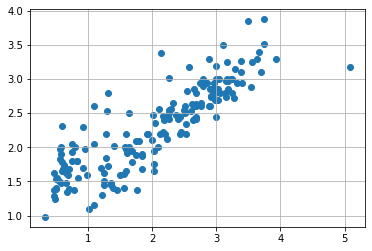

In [16]:
plt.scatter(df['flavanoids'],df['total_phenols'])
plt.grid()

In [17]:
a0=np.random.rand(2) # Dos elementos uniformemente distrubuidos entre 0 y 1
sol3=minimize(fun,a0,args=(df.flavanoids,df.total_phenols))
sol3

      fun: 0.09835764753318653
 hess_inv: array([[ 2.57533484, -1.02270035],
       [-1.02270035,  0.50397459]])
      jac: array([5.58793545e-09, 1.21071935e-08])
  message: 'Optimization terminated successfully.'
     nfev: 15
      nit: 3
     njev: 5
   status: 0
  success: True
        x: array([1.19584439, 0.5417062 ])

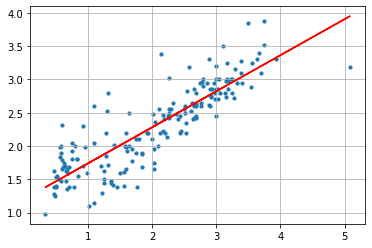

In [18]:
a=sol3.x
x=df.flavanoids
f=a[0]+a[1]*x
plt.scatter(x,df.total_phenols,s=10)
plt.plot(x,f,'r')
plt.grid()

In [19]:
r2_score(f,df.total_phenols)

0.6621537144701987

### Relación lineal entre `ash` vs (`alcalinity_of_ash` y `flavanoids`)

In [20]:
from sklearn.linear_model import LinearRegression

In [21]:
lin=LinearRegression()

In [22]:
df[['flavanoids']].shape

(178, 1)

In [23]:
df['flavanoids'].shape

(178,)

In [24]:
lin.fit(df[['flavanoids']],df['ash'])

LinearRegression()

In [25]:
lin.coef_

array([0.03160684])

In [26]:
lin.intercept_

2.3023780616508027

In [27]:
sol.x

array([2.30237813, 0.0316068 ])

In [28]:
lin.score(df[['flavanoids']],df['ash']) # Buscamos que se acerque a 1  :(

0.013242780145259592

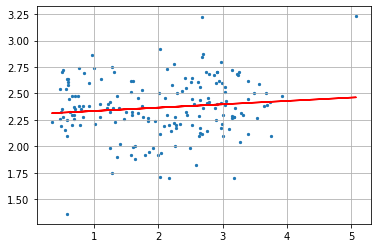

In [29]:
# Gráfica
f=lin.predict(df[['flavanoids']])
plt.scatter(df.flavanoids,df.ash,s=5)
plt.plot(df.flavanoids,f,'r')
plt.grid()

In [30]:
# Ajuste lineal multivariable
#
# ash=a[0]+a[1]*flavanoids+a[2]*alcalinity_of_ash
lin.fit(df[['flavanoids','alcalinity_of_ash']],df.ash)

LinearRegression()

In [31]:
lin.coef_

array([0.08487309, 0.04534213])

In [32]:
lin.intercept_

1.3103441672107297

In [33]:
lin.score(df[['flavanoids','alcalinity_of_ash']],df['ash'])

0.28027504471497966

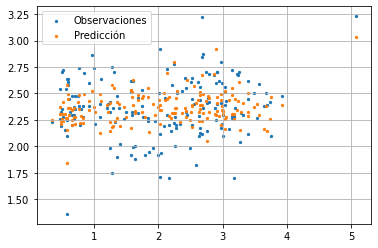

In [34]:
f=lin.predict(df[['flavanoids','alcalinity_of_ash']])
plt.scatter(df.flavanoids,df.ash,s=5,label='Observaciones')
plt.scatter(df.flavanoids,f,s=5,label='Predicción')
plt.legend()
plt.grid()

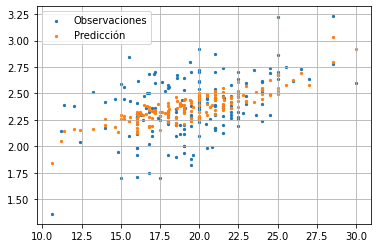

In [35]:
plt.scatter(df.alcalinity_of_ash,df.ash,s=5,label='Observaciones')
plt.scatter(df.alcalinity_of_ash,f,s=5,label='Predicción')
plt.legend()
plt.grid()

In [36]:
# Gráfica 3D
from mpl_toolkits.mplot3d import Axes3D

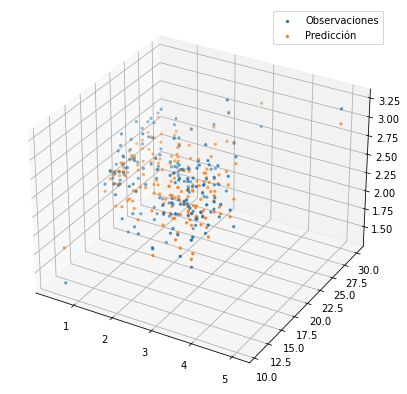

In [37]:
from matplotlib.figure import projections
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
ax.scatter(df.flavanoids,df.alcalinity_of_ash,df.ash,s=5,label='Observaciones')
ax.scatter(df.flavanoids,df.alcalinity_of_ash,f,s=5,label='Predicción')
plt.legend()